In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from dash import Dash, html, dcc, callback, Output, Input

In [2]:
df_green_index = pd.read_csv('green_index.csv')
df_livability = pd.read_csv('livability_index.csv')
df_livability3 = pd.read_csv('livability3.0_inverted.csv')
df_income = pd.read_csv('income_neighborhood.csv')
df_population = pd.read_csv('breda_population.csv')
df_working_pop = pd.read_csv('breda_working.csv',usecols=lambda col: 'Unnamed' not in col)

In [3]:
df_total_job_growth = pd.read_csv('total_job_growth_neighborhoods.csv', encoding='latin1')

In [4]:
df_total_job_growth

,neighborhood,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Valkenberg,3.90%,-4.00%,-5.40%,-11.70%,-4.90%,-0.40%,2.20%,-0.10%,-0.10%,-1.30%,-0.80%
1,Chass,2.60%,-3.20%,1.60%,3.80%,2.00%,-3.80%,3.80%,2.40%,-9.00%,-0.60%,1.20%
2,Fellenoord,-1.10%,-3.80%,7.00%,-1.10%,-6.50%,-0.20%,-34.70%,4.30%,-55.80%,9.70%,17.80%
3,Bark mill,12.60%,-32.30%,17.60%,4.70%,0.10%,1.80%,4.20%,8.80%,1.60%,1.00%,1.90%
4,station,-1.60%,4.40%,7.20%,0.50%,6.60%,6.80%,17.70%,5.00%,-1.00%,-4.70%,-0.30%
5,City,0.90%,-4.20%,-1.60%,-1.10%,-1.50%,-6.70%,4.60%,5.50%,5.80%,-5.90%,-1.80%
6,Belcrum,0.20%,0.20%,11.60%,-3.30%,10.10%,22.60%,25.50%,43.20%,56.30%,1.00%,1.20%
7,Doornbos Line,5.60%,-3.90%,-4.70%,9.00%,2.10%,-2.80%,2.40%,-7.00%,5.40%,-2.40%,4.80%
8,Biesdonk,0.60%,-1.60%,0.40%,-8.90%,7.60%,7.40%,2.10%,-4.00%,7.40%,5.90%,5.00%
9,Geeren South,-7.20%,-16.80%,-5.50%,-4.70%,-16.60%,12.40%,9.20%,6.40%,8.70%,-5.70%,2.50%


In [5]:
df_working_pop

,regions,neighborhood,2020,2021
0,Breda centrum,Valkenberg,"1,730","1,750"
1,Breda centrum,Chass,"2,590","2,630"
2,Breda centrum,Fellenoord,"1,360","1,340"
3,Breda centrum,Schorsmolen,"2,940","2,950"
4,Breda centrum,Station,"2,050","2,070"
5,Breda centrum,City,"2,340","2,360"
6,Breda noord,Belcrum,3110,"3,070"
7,Breda noord,Doornbos-Linie,"3,490","3,620"
8,Breda noord,Biesdonk,"3,690","3,660"
9,Breda noord,Geeren-zuid,"2,740","2,740"


In [6]:
df_population

,regions,neighborhood,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Breda centrum,Valkenberg,1670,1750,1835,1920,1920,1900,1905,2065,2180,1990,1960,1990,1990,2000,2005
1,Breda centrum,Chass,2830,3015,3015,3065,3160,3245,3290,3195,3230,3195,3225,3230,3260,3360,3365
2,Breda centrum,Fellenoord,1430,1410,1475,1385,1460,1485,1545,1550,1545,1570,1590,1590,1585,1565,1565
3,Breda centrum,Schorsmolen,2905,2915,2970,3100,3145,3210,3240,3265,3375,3380,3400,3360,3420,3400,3450
4,Breda centrum,Station,1135,1410,1380,1605,1750,1835,2080,2085,2130,2235,2300,2325,2295,2285,2310
5,Breda centrum,City,1970,2145,2210,2260,2260,2280,2365,2390,2415,2530,2480,2475,2565,2555,2575
6,Breda noord,Belcrum,3395,3320,3365,3365,3415,3440,3485,3485,3605,3950,3990,3990,4075,4000,4005
7,Breda noord,Doornbos-Linie,4000,3980,3975,3975,4375,4415,4295,4345,4345,4385,4365,4390,4300,4350,4435
8,Breda noord,Biesdonk,5065,4930,4940,4940,4940,4975,5005,4985,4970,4995,5075,5055,5030,4945,4895
9,Breda noord,Geeren-zuid,3550,3420,3385,3395,3350,3385,3665,3965,3785,3880,3880,3710,3765,3760,3720


In [7]:
df_income

,regions,neighborhood,2014,2015,2016,2017,2018,2019,2020,2021
0,Breda centrum,Valkenberg,"1,600","1,800","1,700","1,800","1,700","1,800","1,700","1,800"
1,Breda centrum,Chass,"2,700","2,700","2,800","2,800","2,800","2,800","2,800","2,900"
2,Breda centrum,Fellenoord,"1,335","1,300","1,300","1,400","1,300","1,300","1,300","1,300"
3,Breda centrum,Schorsmolen,"2,765","2,800","2,900","2,900","2,900","2,900","3,000","2,900"
4,Breda centrum,Station,"1,800","1,800","1,800","1,900","2,000","2,000","2,000","2,000"
5,Breda centrum,City,"2,100","2,100","2,100","2,300","2,300","2,200","2,300","2,300"
6,Breda noord,Belcrum,"2,600","2,600","2,700","3,000","3,100","3,100","3,200","3,200"
7,Breda noord,Doornbos-Linie,"3,400","3,500","3,500","3,500","3,500","3,600","3,600","3,700"
8,Breda noord,Biesdonk,"3,800","3,900","3,800","3,900","3,900","3,900","3,900","3,900"
9,Breda noord,Geeren-zuid,"2,715","2,815","2,815","2,915","2,915","2,900","2,900","3,000"


In [8]:
df_livability3

,regions,neighborhood,2001,2002,2003,2004,2005,2006,2007,2008,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Breda centrum,Valkenberg,180.0,190.0,180.0,180.0,200.0,200,210,220,...,260,270,290,310,310,320,340,360,390,420
1,Breda centrum,Chass,300.0,300.0,290.0,310.0,320.0,340,370,390,...,460,470,470,480,470,480,510,500,520,570
2,Breda centrum,Fellenoord,50.0,50.0,50.0,50.0,60.0,60,50,60,...,90,90,100,90,100,90,100,130,160,200
3,Breda centrum,Schorsmolen,190.0,190.0,190.0,190.0,190.0,200,210,230,...,260,270,290,300,310,320,360,380,410,430
4,Breda centrum,Station,140.0,130.0,130.0,130.0,130.0,140,150,150,...,260,290,310,360,370,470,540,560,530,570
5,Breda centrum,City,570.0,570.0,560.0,560.0,580.0,610,630,660,...,700,700,710,700,680,720,730,760,820,860
6,Breda noord,Belcrum,150.0,160.0,160.0,160.0,190.0,190,210,240,...,260,280,300,310,340,400,400,440,470,490
7,Breda noord,Doornbos-Linie,170.0,160.0,170.0,170.0,160.0,170,190,210,...,290,310,310,320,330,350,370,380,410,480
8,Breda noord,Biesdonk,130.0,130.0,140.0,150.0,140.0,150,170,180,...,210,210,240,230,250,270,270,300,320,340
9,Breda noord,Geeren-zuid,110.0,120.0,110.0,110.0,110.0,120,130,120,...,150,190,170,170,180,190,200,230,260,270


In [9]:
df_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   regions       56 non-null     object
 1   neighborhood  56 non-null     object
 2   2014          56 non-null     object
 3   2015          56 non-null     object
 4   2016          56 non-null     object
 5   2017          56 non-null     object
 6   2018          56 non-null     object
 7   2019          56 non-null     object
 8   2020          56 non-null     object
 9   2021          56 non-null     object
dtypes: object(10)
memory usage: 4.5+ KB


In [10]:
df_livability3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   regions       56 non-null     object 
 1   neighborhood  56 non-null     object 
 2   2001          55 non-null     float64
 3   2002          55 non-null     float64
 4   2003          55 non-null     float64
 5   2004          55 non-null     float64
 6   2005          55 non-null     float64
 7   2006          56 non-null     int64  
 8   2007          56 non-null     int64  
 9   2008          56 non-null     int64  
 10  2009          56 non-null     int64  
 11  2010          56 non-null     int64  
 12  2011          56 non-null     int64  
 13  2012          56 non-null     int64  
 14  2013          56 non-null     int64  
 15  2014          56 non-null     int64  
 16  2015          56 non-null     int64  
 17  2016          56 non-null     int64  
 18  2017          56 non-null     in

In [11]:
df_population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   regions       56 non-null     object
 1   neighborhood  56 non-null     object
 2   2008          56 non-null     int64 
 3   2009          56 non-null     int64 
 4   2010          56 non-null     int64 
 5   2011          56 non-null     int64 
 6   2012          56 non-null     int64 
 7   2013          56 non-null     int64 
 8   2014          56 non-null     int64 
 9   2015          56 non-null     int64 
 10  2016          56 non-null     int64 
 11  2017          56 non-null     int64 
 12  2018          56 non-null     int64 
 13  2019          56 non-null     int64 
 14  2020          56 non-null     int64 
 15  2021          56 non-null     int64 
 16  2022          56 non-null     int64 
dtypes: int64(15), object(2)
memory usage: 7.6+ KB


In [12]:
df_working_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   regions       56 non-null     object
 1   neighborhood  56 non-null     object
 2   2020          56 non-null     object
 3   2021          56 non-null     object
dtypes: object(4)
memory usage: 1.9+ KB


In [13]:
df_total_job_growth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   neighborhood  56 non-null     object
 1   2011          56 non-null     object
 2   2012          56 non-null     object
 3   2013          56 non-null     object
 4   2014          56 non-null     object
 5   2015          56 non-null     object
 6   2016          56 non-null     object
 7   2017          56 non-null     object
 8   2018          56 non-null     object
 9   2019          56 non-null     object
 10  2020          56 non-null     object
 11  2021          56 non-null     object
dtypes: object(12)
memory usage: 5.4+ KB


In [14]:
df_livability3 = df_livability3.melt(id_vars=['neighborhood','regions'], 
        var_name="year", 
        value_name="livability_score")
df_income = df_income.melt(id_vars=['neighborhood','regions'], 
        var_name="year", 
        value_name="income_score")
df_population = df_population.melt(id_vars=['neighborhood','regions'],
        var_name = 'year',
        value_name='population')
df_working_pop = df_working_pop.melt(id_vars=['neighborhood','regions'],
        var_name='year',
        value_name='working_population')
df_total_job_growth = df_total_job_growth.melt(id_vars=['neighborhood'],
        var_name='year',
        value_name='total_job_growth')

In [15]:
df_income.dropna(inplace=True)
df_livability3.dropna(inplace=True)
df_population.dropna(inplace=True)
df_working_pop.dropna(inplace=True)
df_total_job_growth.dropna(inplace=True)

In [16]:
df_livability_score = df_livability3.sort_values('neighborhood', ascending = True)
df_income_score = df_income.sort_values('neighborhood', ascending = True)
df_population = df_population.sort_values('neighborhood', ascending = True)
df_working_pop = df_working_pop.sort_values('neighborhood', ascending = True)
df_total_job_growth = df_total_job_growth.sort_values('neighborhood', ascending = True)



In [17]:
df_livability_score['income'] = df_livability_score['neighborhood'].apply(lambda x: df_income_score.loc[df_income_score['neighborhood'] == x, 'income_score'].values[0] if x in df_income_score['neighborhood'].values else None)
df_livability_score['population'] = df_livability_score['neighborhood'].apply(lambda x: df_population.loc[df_population['neighborhood'] == x, 'population'].values[0] if x in df_population['neighborhood'].values else None)
df_livability_score['working_population'] = df_livability_score['neighborhood'].apply(lambda x: df_working_pop.loc[df_working_pop['neighborhood'] == x, 'working_population'].values[0] if x in df_working_pop['neighborhood'].values else None)
df_livability_score['total_job_growth'] = df_livability_score['neighborhood'].apply(lambda x: df_total_job_growth.loc[df_total_job_growth['neighborhood'] == x, 'total_job_growth'].values[0] if x in df_total_job_growth['neighborhood'].values else None)


In [18]:
df_livability_score['income'] = df_livability_score['income'].str.replace(',', '')
df_livability_score['working_population'] = df_livability_score['working_population'].str.replace(',', '')

In [19]:
def data_quality_report(data):
    # Basic information about the data
    report = {}
    report['Number of Rows'] = len(data)
    report['Number of Columns'] = len(data.columns)
    return report

In [20]:
print(data_quality_report(df_population))
print(data_quality_report(df_income_score))
print(data_quality_report(df_livability_score))
print(data_quality_report(df_working_pop))

{'Number of Rows': 840, 'Number of Columns': 4}
{'Number of Rows': 448, 'Number of Columns': 4}
{'Number of Rows': 1171, 'Number of Columns': 8}
{'Number of Rows': 112, 'Number of Columns': 4}


In [21]:
df_livability_score

,neighborhood,regions,year,livability_score,income,population,working_population,total_job_growth
774,Bavel,Bavel,2014,430.0,4400,5395,3970,"-7,9%"
102,Bavel,Bavel,2002,260.0,4400,5395,3970,"-7,9%"
1054,Bavel,Bavel,2019,510.0,4400,5395,3970,"-7,9%"
382,Bavel,Bavel,2007,300.0,4400,5395,3970,"-7,9%"
158,Bavel,Bavel,2003,260.0,4400,5395,3970,"-7,9%"
...,...,...,...,...,...,...,...,...
184,Zandberg,Breda oost,2004,470.0,3900,5155,4020,2.00%
408,Zandberg,Breda oost,2008,560.0,3900,5155,4020,2.00%
72,Zandberg,Breda oost,2002,450.0,3900,5155,4020,2.00%
912,Zandberg,Breda oost,2017,800.0,3900,5155,4020,2.00%


In [22]:
df_livability_score.reset_index(inplace=True)
df_livability_score.drop(['index'], axis=1)


,neighborhood,regions,year,livability_score,income,population,working_population,total_job_growth
0,Bavel,Bavel,2014,430.0,4400,5395,3970,"-7,9%"
1,Bavel,Bavel,2002,260.0,4400,5395,3970,"-7,9%"
2,Bavel,Bavel,2019,510.0,4400,5395,3970,"-7,9%"
3,Bavel,Bavel,2007,300.0,4400,5395,3970,"-7,9%"
4,Bavel,Bavel,2003,260.0,4400,5395,3970,"-7,9%"
...,...,...,...,...,...,...,...,...
1166,Zandberg,Breda oost,2004,470.0,3900,5155,4020,2.00%
1167,Zandberg,Breda oost,2008,560.0,3900,5155,4020,2.00%
1168,Zandberg,Breda oost,2002,450.0,3900,5155,4020,2.00%
1169,Zandberg,Breda oost,2017,800.0,3900,5155,4020,2.00%


In [23]:
df_livability_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1171 entries, 0 to 1170
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               1171 non-null   int64  
 1   neighborhood        1171 non-null   object 
 2   regions             1171 non-null   object 
 3   year                1171 non-null   object 
 4   livability_score    1171 non-null   float64
 5   income              1171 non-null   object 
 6   population          1171 non-null   int64  
 7   working_population  1171 non-null   object 
 8   total_job_growth    751 non-null    object 
dtypes: float64(1), int64(2), object(6)
memory usage: 82.5+ KB


In [24]:
df_livability_score['income'] = pd.to_numeric(df_livability_score['income'], errors='coerce', downcast='integer')
df_livability_score['livability_score'] = pd.to_numeric(df_livability_score['livability_score'], errors='coerce', downcast='integer')
df_livability_score['working_population'] = pd.to_numeric(df_livability_score['working_population'], errors='coerce', downcast='integer')


In [25]:
df_livability_score.drop(['index'],axis=1)

,neighborhood,regions,year,livability_score,income,population,working_population,total_job_growth
0,Bavel,Bavel,2014,430,4400,5395,3970,"-7,9%"
1,Bavel,Bavel,2002,260,4400,5395,3970,"-7,9%"
2,Bavel,Bavel,2019,510,4400,5395,3970,"-7,9%"
3,Bavel,Bavel,2007,300,4400,5395,3970,"-7,9%"
4,Bavel,Bavel,2003,260,4400,5395,3970,"-7,9%"
...,...,...,...,...,...,...,...,...
1166,Zandberg,Breda oost,2004,470,3900,5155,4020,2.00%
1167,Zandberg,Breda oost,2008,560,3900,5155,4020,2.00%
1168,Zandberg,Breda oost,2002,450,3900,5155,4020,2.00%
1169,Zandberg,Breda oost,2017,800,3900,5155,4020,2.00%


In [26]:
df_livability_score.to_csv('main_table_livability.csv')

In [27]:
df_livability_score_sorted = df_livability_score.sort_values(by='year',ascending=True)

In [28]:
result = pd.merge(df_green_index, df_livability, on='cbs_grid_code')

In [29]:
df_green_index

,year,image_id,latitude,longitude,date,green_score,cbs_grid_code
0,2016,eXclMwsqcg6PJWsKWv-M_w,"51,571740749","4,7728537698",2016-07-01,20,E1124N3982
1,2016,eXclMwsqcg6PJWsKWv-M_w,"51,571740749","4,7728537698",2016-07-01,17,E1124N3982
2,2014,EXcYr_EUHvCSTprOafdaWQ,"51,577759666","4,7533877899",2014-07-01,24,E1110N3989
3,2014,EXcYr_EUHvCSTprOafdaWQ,"51,577759666","4,7533877899",2014-07-01,22,E1110N3989
4,2014,EXcYr_EUHvCSTprOafdaWQ,"51,577759666","4,7533877899",2014-07-01,22,E1110N3989
...,...,...,...,...,...,...,...
298033,2009,fZWK7WguY60SvsJa9Vs2KQ,"51,614320609","4,8211790957",2009-07-01,34,E1157N4029
298034,2009,fZWK7WguY60SvsJa9Vs2KQ,"51,614320609","4,8211790957",2009-07-01,29,E1157N4029
298035,2009,fZWK7WguY60SvsJa9Vs2KQ,"51,614320609","4,8211790957",2009-07-01,22,E1157N4029
298036,2016,eXclMwsqcg6PJWsKWv-M_w,"51,571740749","4,7728537698",2016-07-01,44,E1124N3982


In [30]:
df_livability

,cbs_grid_code,livability_score
0,E1068N3982,2.423907
1,E1071N4012,2.376780
2,E1073N4018,2.533115
3,E1074N4011,2.405825
4,E1074N4017,2.502466
...,...,...
2932,E1168N3974,2.364988
2933,E1168N3975,2.348943
2934,E1168N3976,2.341390
2935,E1168N3977,2.400848


In [31]:
result

,year,image_id,latitude,longitude,date,green_score,cbs_grid_code,livability_score
0,2016,eXclMwsqcg6PJWsKWv-M_w,"51,571740749","4,7728537698",2016-07-01,20,E1124N3982,2.339902
1,2016,eXclMwsqcg6PJWsKWv-M_w,"51,571740749","4,7728537698",2016-07-01,17,E1124N3982,2.339902
2,2014,LFiz3F0oA-nfANVSg3Ul8A,"51,571488046","4,7733100592",2014-07-01,62,E1124N3982,2.339902
3,2014,LFiz3F0oA-nfANVSg3Ul8A,"51,571488046","4,7733100592",2014-07-01,52,E1124N3982,2.339902
4,2014,LFiz3F0oA-nfANVSg3Ul8A,"51,571488046","4,7733100592",2014-07-01,46,E1124N3982,2.339902
...,...,...,...,...,...,...,...,...
198607,2009,0unkvmQ6_Gu7m9dJ-vToew,"51,590550543","4,7469691713",2009-05-01,35,E1106N4003,2.281109
198608,2009,0unkvmQ6_Gu7m9dJ-vToew,"51,590550543","4,7469691713",2009-05-01,33,E1106N4003,2.281109
198609,2009,0unkvmQ6_Gu7m9dJ-vToew,"51,590550543","4,7469691713",2009-05-01,24,E1106N4003,2.281109
198610,2009,0unkvmQ6_Gu7m9dJ-vToew,"51,590550543","4,7469691713",2009-05-01,14,E1106N4003,2.281109


In [32]:
#result_year = result.groupby('year')['green_score','livability_score'].mean().reset_index()
result_year = result.groupby(by='year')[['green_score', 'livability_score']].mean().reset_index()

In [33]:
result_year

,year,green_score,livability_score
0,2009,29.254057,2.280985
1,2010,25.648551,2.492753
2,2014,26.973524,2.192631
3,2015,28.263416,2.230328
4,2016,28.257213,2.243373
5,2017,26.410429,2.203087
6,2018,22.647566,2.233446


In [34]:
import plotly.express as px

fig1 = px.line(result_year, x="year", y="livability_score", title='Livability score per year')
fig = px.line(result_year, x="year", y="green_score", title='Green index score per year')

fig.show()
fig1.show()

In [35]:
df_livability_score

,index,neighborhood,regions,year,livability_score,income,population,working_population,total_job_growth
0,774,Bavel,Bavel,2014,430,4400,5395,3970,"-7,9%"
1,102,Bavel,Bavel,2002,260,4400,5395,3970,"-7,9%"
2,1054,Bavel,Bavel,2019,510,4400,5395,3970,"-7,9%"
3,382,Bavel,Bavel,2007,300,4400,5395,3970,"-7,9%"
4,158,Bavel,Bavel,2003,260,4400,5395,3970,"-7,9%"
...,...,...,...,...,...,...,...,...,...
1166,184,Zandberg,Breda oost,2004,470,3900,5155,4020,2.00%
1167,408,Zandberg,Breda oost,2008,560,3900,5155,4020,2.00%
1168,72,Zandberg,Breda oost,2002,450,3900,5155,4020,2.00%
1169,912,Zandberg,Breda oost,2017,800,3900,5155,4020,2.00%


In [36]:
fig = px.scatter(df_livability_score_sorted, x="livability_score", y="income",animation_frame="year",size="population",animation_group="neighborhood",hover_name="neighborhood",log_x=True, size_max=60,color="regions",title='Relation between income and livability')
fig["layout"].pop("updatemenus") # optional, drop animation buttons
fig.show()


In [37]:
correlation = df_livability_score['income'].corr(df_livability_score['livability_score'])
correlation

0.6782732715845692

In [38]:
df_livability_score_sorted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1171 entries, 963 to 669
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   index               1171 non-null   int64 
 1   neighborhood        1171 non-null   object
 2   regions             1171 non-null   object
 3   year                1171 non-null   object
 4   livability_score    1171 non-null   int16 
 5   income              1171 non-null   int16 
 6   population          1171 non-null   int64 
 7   working_population  1171 non-null   int16 
 8   total_job_growth    751 non-null    object
dtypes: int16(3), int64(2), object(4)
memory usage: 70.9+ KB


In [39]:
df_livability_regions = df_livability_score_sorted.groupby(by='regions')[['working_population','population','income']].mean().reset_index()

In [40]:
df_livability_regions

,regions,working_population,population,income
0,Bavel,2043.333333,2760.000000,2200.000000
1,Breda centrum,2170.000000,2330.833333,2200.000000
2,Breda noord,2445.092025,3216.319018,2451.012270
3,Breda noord-west,2258.888889,2988.888889,2322.222222
4,Breda oost,3068.333333,3844.166667,3100.000000
5,Breda west,2484.000000,3078.500000,2560.000000
6,Breda zuid,2880.000000,4105.000000,3200.000000
7,Breda zuid-oost,2718.000000,3639.000000,2840.000000
8,Prinsenbeek,4335.500000,5775.000000,4650.000000
9,Tetrigen,1960.000000,2855.000000,1928.333333


In [41]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
fig = make_subplots(rows=1, cols=3, specs=[[{'type':'domain'}, {'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=df_livability_regions['regions'], values=df_livability_regions['population'], name="Population"),
              1, 1)
fig.add_trace(go.Pie(labels=df_livability_regions['regions'], values=df_livability_regions['working_population'], name="Workforce"),
              1, 2)
fig.add_trace(go.Pie(labels=df_livability_regions['regions'], values=df_livability_regions['income'], name="Income"),
              1, 3)
fig.update_traces(hole=.4, hoverinfo="label+percent+name")

annotations = [
    dict(text='Population', x=0.1, y=-0.2, showarrow=False, font=dict(size=12)),
    dict(text='Workforce', x=0.5, y=-0.2, showarrow=False, font=dict(size=12)),
    dict(text='Income recipients', x=0.92, y=-0.2, showarrow=False, font=dict(size=12))
]
fig.update_layout(annotations=annotations)
fig.show()

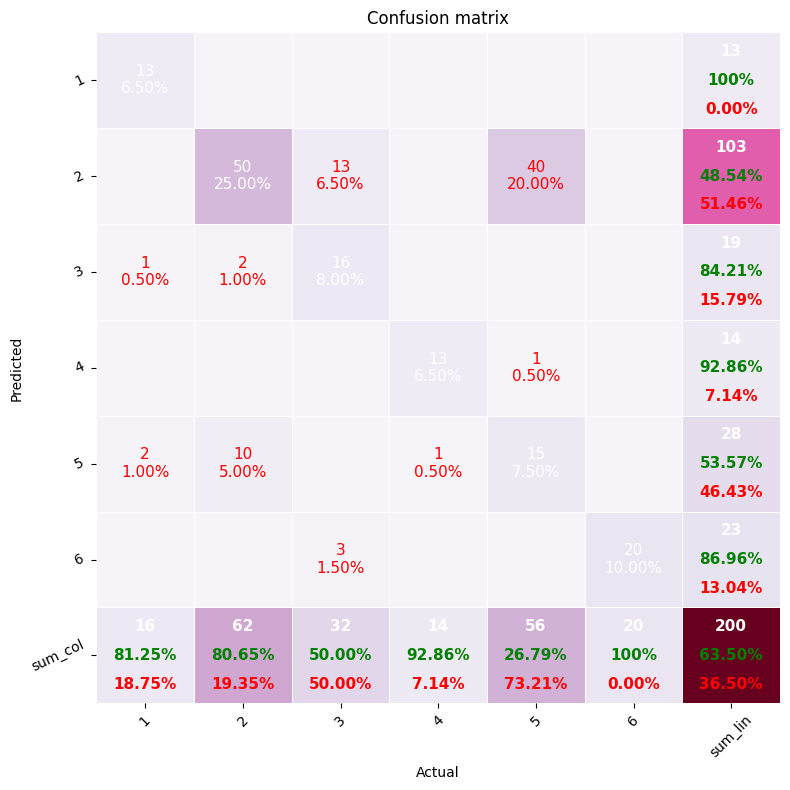

In [42]:
import numpy as np
import pandas as pd
from pretty_confusion_matrix import pp_matrix

array = np.array([[13,  0,  1,  0,  2,  0],
                  [0, 50,  2,  0, 10,  0],
                  [0, 13, 16,  0,  0,  3],
                  [0,  0,  0, 13,  1,  0],
                  [0, 40,  0,  1, 15,  0],
                  [0,  0,  0,  0,  0, 20]])

# get pandas dataframe
df_cm = pd.DataFrame(array, index=range(1, 7), columns=range(1, 7))
# colormap: see this and choose your more dear
cmap = 'PuRd'
pp_matrix(df_cm, cmap=cmap)